# CA1: Data Analysis with Numpy and Matplotlib
Name: Alden Chia Yu Xiang

Admin Number: 2205584

Elective Class: EL/EP0302/FT/03

Submission: CA1

# Scenario & Question

Today, we will explore a very common question that student have in mind: Is pursuing a university education after completing my polytechnic program worth it? The debate have risen over the years, and it have always been revolving around  the value of a degree verus the importance of practical skills. To truly find out more on this matter, I will be analysing data to better understand how attending university can impact ones future earning and if certain courses have more significant influence on future success. Additionally, I will provide insights to help students make more informed decisions about their educational pathways, guiding them towards choosing the right course to secure a promising future. Let us dive into the data and uncover insights that can guide the students in making a more informed decisions about their educational pathways.

### Scenario

Adam, a male student just ORD from National Service. He took digital marketing when he was in Singapore Polytechnic. Though not the best student, he was attentive and focus in his studies. He will never hand in projects late nor not study for a small quiz. As a indecisive person, he picked the business school as majority of his friends is in there. His GPA is slightly above the average; 3.83.

Now that he is out of National Service, he have 2 choices.

    1. Go out to work with his Polytechnic Diploma
    2. Advance his education and go into a University
    
With this 2 path in front of him, he wondered to himself. 'Is it really worth to spend another 3 years in a university? Can't I just go out to work with my diploma and gain more work experience? If is really worth it... what course should I go for?'

### Problem Statement

Is going to a University really worth my time? I do not even know what I am interested in, I do not know what to choose so that I can have a stable life in the future.

# Libraries

These are the libraries that I will be using. Remember to run it before running of your code :D

In [1666]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Functions

These functions are primarily used to import the csv files to form graphs. Remember to run the function before running any code!

## Function 1: csv2txt

This function allows us to standadise the way we are importing our data. Here are some additional arguments that I have included:
    1. autostrip -> This argument remove leading and trailing white spaces. With this argument, it would be easier for us to call upon the different headers and they are now all standardised without any white space
    2. missing_values -> This argument ensure that if there were to be any missing cells somewhere in the csv file, it would be replaced with 'N/A'. This ensures that the number of columns each row are the same, avoiding an error related to that.

In [1667]:
def csv2txt(filename): # use this function to import data using file name
    data = np.genfromtxt(
    "Data/" + filename, # file path
    delimiter=",", # comma used to seperate each cell
    dtype=int, # data type = none for it to auto detect
    names=True, # first row become column name
    autostrip=True, # remove leading and trailing whitespaces
    comments=None, # no specific character indicating the start of comments
    encoding=None, # uses default encoding
    missing_values='N/A' # fill in missing value with 'N/A'
)

    return data

## Function 2: dtypeNone

Similar to function 1 above, dtypeNone function have the same argument as it. The only difference from csv2txt function is that the data type is None instead of integer. I created this function to make my life easier when clustering data. If I import as an integer and there were strings in any of the cells, the values of those strings will become -1. Therefore to prevent confusion and chances of inaccuracy, I created this function.

In [1668]:
def dtypeNone(filename): # use this function to import data using file name
    data = np.genfromtxt(
    "Data/" + filename, # file path
    delimiter=",", # comma used to seperate each cell
    dtype=None, # data type = none for it to auto detect
    names=True, # first row become column name
    autostrip=True, # remove leading and trailing whitespaces
    comments=None, # no specific character indicating the start of comments
    encoding=None, # uses default encoding
    missing_values='N/A' # fill in missing value with 'N/A'
)

    return data

## Function 3: basicInfo

The last function that I have created is the basicInfo function. This function serves as a standard method and structure that I use when introducing the dataset that I am using.

In [1669]:
def basicInfo(filename, data, about): # use this function to print simply information about dataset
    print(f'=====================================================================================\nHere are some information about {filename}')
    print(about)
    print(f'This dataset contains data from {np.min(data["year"])} to {np.max(data["year"])}')
    print(f'There are a total of {data.shape[0]} rows and {len(data.dtype.names)} columns\n=====================================================================================')

# Datasets

From this section on, I will be introducing the dataset that I have used to make graphs and analysis.

## Graduatesbyinstitutions.csv (provided)

The first dataset given is graduates by institutions. Here we are able to see the total number of graduates from different university annually.

In [1670]:
# Graduatesbyinstitutions.csv (provided)

filename = 'Graduatesbyinstitutions.csv'
gradsByInt = csv2txt(filename)

# Information
about = 'This dataset shows you the number of graduates from each institution, providing seperate count for males and females'
basicInfo(filename, gradsByInt, about)

Here are some information about Graduatesbyinstitutions.csv
This dataset shows you the number of graduates from each institution, providing seperate count for males and females
This dataset contains data from 1983 to 2021
There are a total of 78 rows and 19 columns


## GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv (provided)

The next dataset given to us is the GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv dataset. This dataset gives us insights on each degree from each university employment rate and wage data.

In [1671]:
# GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv (provided)

filename = 'GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv'
gradsSurvey = csv2txt(filename)
dataSurvey = dtypeNone(filename)

# Information
about = 'This dataset shows you the percentage of employment and salary for each degree program at each university'
basicInfo(filename, gradsSurvey, about)

Here are some information about GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv
This dataset shows you the percentage of employment and salary for each degree program at each university
This dataset contains data from 2013 to 2021
There are a total of 1121 rows and 12 columns


## wage_05_majorocc_annual.csv (personal)

This is the first personal dataset that I am using to aid with my investigation. This dataset gives us insights on the mean wage per industry in the year 2022.

In [1682]:
# wage_05_majorocc_annual.csv (personal)

filename = 'wage_05_majorocc_annual.csv'
wage = dtypeNone(filename)

# Information
about = 'This dataset shows you the number of vacant spots for each job in the industry.'
basicInfo(filename, wage, about)

Here are some information about wage_05_majorocc_annual.csv
This dataset shows you the number of vacant spots for each job in the industry.
This dataset contains data from 2022 to 2022
There are a total of 360 rows and 6 columns


## 9136_modified.csv (personal)

The fourth dataset, which is one that I have picked up, is 9136.csv. I have modified this dataset as there were metadata from row 1 to 11. This allow me to sort the data better, without any hindrance.

In [1673]:
# JobVacancybyIndustryandOccupationalGroup.csv (personal)

filename = '9136_modified.csv'

localVSglobal = np.genfromtxt(
    "Data/" + filename,
    delimiter=",",
    dtype=None,  # Let it auto-detect data types
    names=True,
    autostrip=True,
    comments=None,
    encoding=None,
    missing_values='N/A')

# Information
about = 'This dataset shows you the number of vacant spots for each job in the industry.'
# print(data['Singapore'])


# Graphs

This section focuses on the analyzing of data using the dataset above.

1. Which aspect of my question am I answering
   
2. How will I be doing it (code)
   
3. Code + Graph
   
4. Why this graph + Analyzing graph

## Graph 1 - Bar graph

This graph will give us a better view of the employment rate of graduates and their monthly wage according to the industry. Do take note that this file only provided data for 9 years: 2013 to 2021. I will only be using data from less niche degree like business, engineering, and science etc.

### Terminology

To start things off, I will be extracting the years and all the degrees (not unique). Next, I made a list of the more common industry and filter through the entire list of degrees, assigning each degree index to a industry in the list. Since not all degree name contains the name of the industry (e.g. accountancy, dentistry), a next level of filter is added (if-else statements) to assign them to their respective industry. There will 2 sets of data at the end. The first one being a dictionary (sch_dict) which stores the industry names as the key and the indexes of the degree as the values. The other is a list (unincluded) that contains the unincluded degrees.

The second step is the extract the data that we need from each row (index); overall employment rate and basic monthly mean. First, I initialised 3 dictionary; employed: store data of employment rate, monthly_mean: store data on basiic monthly mean, and count: store the number of times each time a data is added into employed for each industry each year. Here is a simple breakdown of what I did this part:
    1. loop through all industry and initialise it as the primary key for both dictionary
    2. initialise the secondary key (value of industry) for the year
    3. make each value of the year for each industry as 0
        e.g. employed = {'business': {'2013': 0, '2014': 0...}, 'engineering': {'2013': 0, '2014': 0...}...}
    4. start adding the data in for employed and month wage respectively into each industry according to years
    5. filter out the 'na' value
    6. loop through each industry each year and divide it by the count value of it to get the average
    7. if the industry key (year) does not have any value, it will go through an if-else statement
    8. standardise data to 2 decimal point

The last step is the plotting of graph. This graph is more complicate than the line graph before as I will be plotting a bar graph and a line graph combine. Firstly, I initialise the x_axis value to 8 (number of industry). Next I create a dictionary to store the industry values by year (e.g. {2013: {'business': 100, 'engineering': 200...}, 2014...}). Next, I set up subplots, I make it as a 3 by 3 as I will have having 9 graphs (9 years). I also defined the overal figure structure and title. Next, I make use of the tab10 color map provided by matplotlib and assign it to each industry. To put the values in, I looped the industry by year dictionary to extract both the number of employed and and monthly wage to put them into their own list. Next, I plot the bar graph, remove the x axis label as the industry names would overlap one another, and added the values on top of each bar. Next I plotted the line graph using twinx (allows me to have 2 y axis using the same x axis). I added the label for the line graph on the right and set the ticks to ensure that it is consistent for all 9 graphs. Take note that it loops for 9 times. Lastly, I set the legend to be outside of the subplot and put it above before showing the graph.

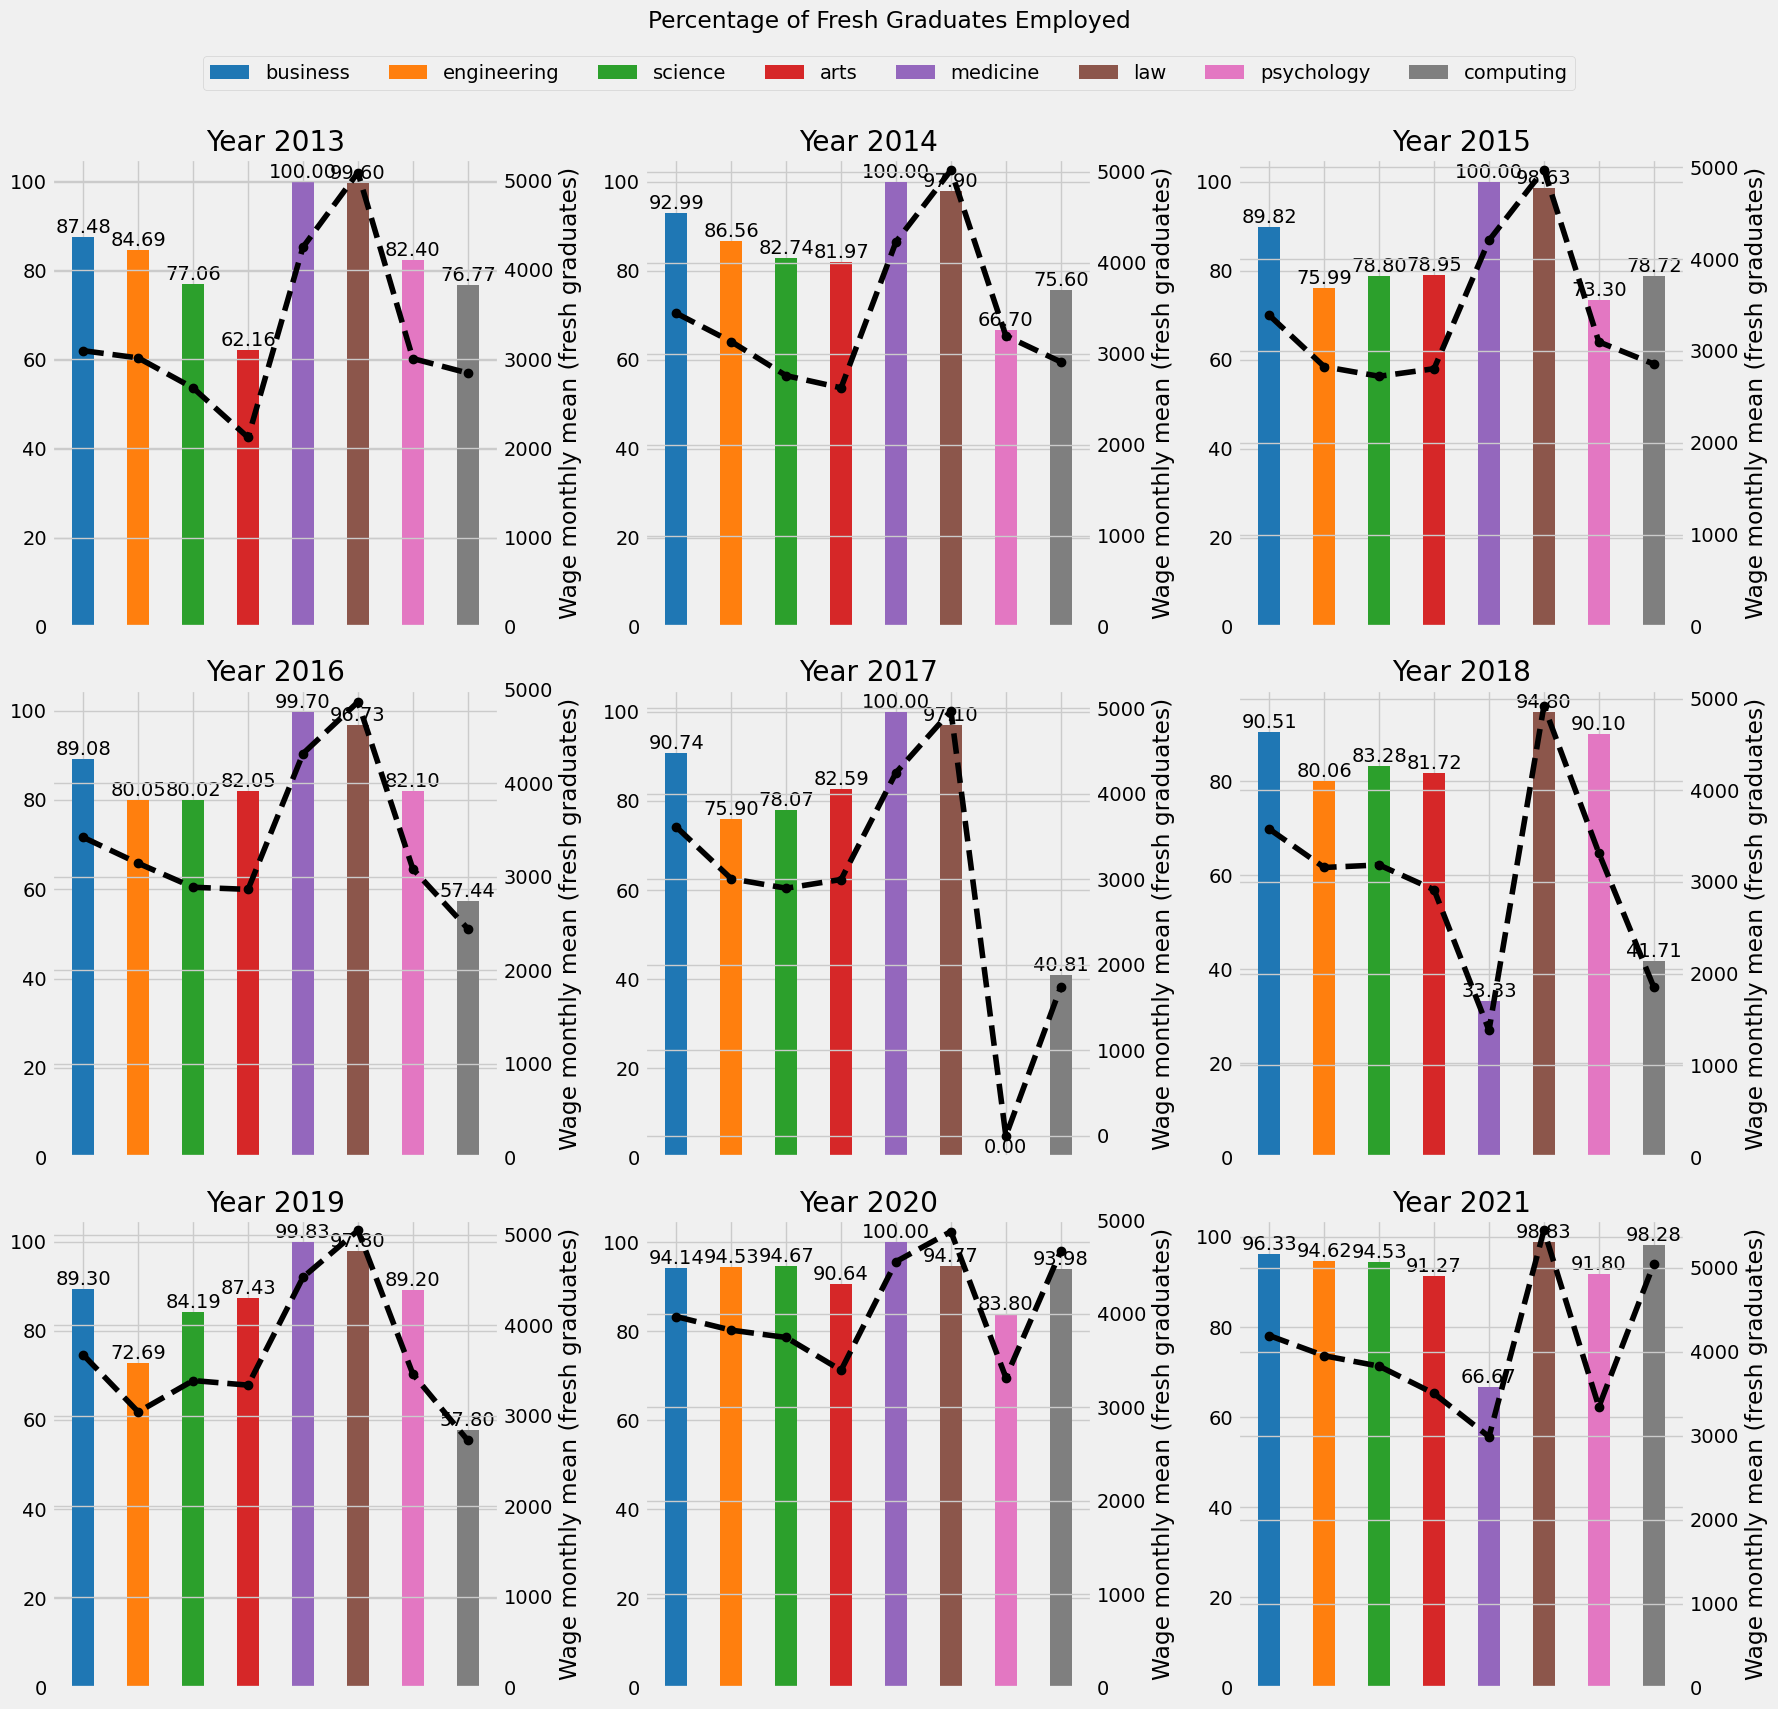

In [1699]:
# data extration
years = np.unique(gradsSurvey['year']) # extrating the years
degrees = dataSurvey['degree'].astype(str)  # extracting the degrees
degrees = np.char.lower(degrees) # standadizeing it to lower case
industry = ['business', 'engineering', 'science', 'arts', 'medicine', 'law', 'psychology', 'computing']
unincluded = []
sch_dict = {ind: [] for ind in industry}

# 'AI' part
for i, deg in enumerate(degrees): # loops through all the degree (note that is not unqiue as we want everything)
    included = False # to filter the remaining degree that are not included into the unincluded list

    for ind in industry:
        if ind in deg:
            sch_dict[ind].append(i) # check for the industry name in the degree. if it is, it will append its index to that industry
            included = True # avoid being into the unincluded list
            break # if it falls into the industry, end it to prevent adding it two times
    # manual checking as not all degree name have the industry name in it
    if not included:
        if 'accountancy' in deg or 'economics' in deg or 'human' in deg:
            sch_dict['business'].append(i)
            included = True # make sure to make it true so that it will not be in the unincluded list
        elif 'physics' in deg or 'chemistry' in deg:
            sch_dict['science'].append(i)
            included = True
        elif 'art' in deg or 'music' in deg:
            sch_dict['arts'].append(i)
            included = True
        elif 'denta' in deg:
            sch_dict['medicine'].append(i)
            included = True
        elif 'information' in deg:
            sch_dict['computing'].append(i)
            included = True

    if not included:
        unincluded.append(deg) # once it go through the entire if else statement, it will be appended to the unincluded list if it is not in any industry
   
# getting the data from the csv file
employed = {}
monthly_mean = {}
count = {}
for industry_name, indices in sch_dict.items(): # loop through sch_dict.items to get both key and value
    employed[industry_name] = {} # initialised each the key in employed as the industry name whenever this loop
    monthly_mean[industry_name] = {}
    count[industry_name] = {}
    
    for index in indices: # loop through the value in each key (the long number of indexes)
        current_year = dataSurvey['year'][index] # use the year value for each index row and initialise it as the key

        employed[industry_name].setdefault(current_year, 0) # if there are no value in for the key (year), it will be 0, else it will not change        
        employment_rate = dataSurvey['employment_rate_overall'][index]
        
        monthly_mean[industry_name].setdefault(current_year, 0)
        monthly_wage = dataSurvey['basic_monthly_mean'][index]
        
        count[industry_name].setdefault(current_year, 0)
        count[industry_name][current_year] += 1

        # make sure to remove 'na'
        if employment_rate != 'na':
            employed[industry_name][current_year] += float(employment_rate) # add in employment rate (in %)
        if monthly_wage != 'na':
            monthly_mean[industry_name][current_year] += float(monthly_wage)

# finding the average of employed and monthly_mean
for i in employed:
    for x in years:
        # check if the keys exist before accessing them
        if i in employed and x in employed[i] and i in count and x in count[i] and count[i][x] != 0:
            employed[i][x] = employed[i][x] / count[i][x]
            monthly_mean[i][x] = monthly_mean[i][x] / count[i][x]
        else:
            # handle the case where keys are missing or count is zero
            employed[i][x] = 0
            monthly_mean[i][x] = 0
        
# making the values 1dp before doing anything
for i in employed:
    for x in employed[i]:
        employed[i][x] = (round(employed[i][x], 2))
for i in monthly_mean:
    for x in monthly_mean[i]:
        monthly_mean[i][x] = (round(monthly_mean[i][x], 2))



# graph plotting (FINALLY)
x_axis = np.arange(len(industry))

# key: year, value: dict: key: industry, value: number
industry_values_by_year = {}
for year in years:
    industry_values_by_year[year] = {}
    for industry, values in employed.items():
        industry_values_by_year[year][industry] = values.get(year, 0)

# re-initializing industry just to be safe
industry = ['business', 'engineering', 'science', 'arts', 'medicine', 'law', 'psychology', 'computing']

# setting up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18)) # a total of 9 graphs
fig.suptitle('Percentage of Fresh Graduates Employed')

# defining a color map for each industry
colors = plt.cm.tab10.colors[:len(industry)]

index = 0
for year, values_by_industry in industry_values_by_year.items():
    # extracting values for the bar graph and line graph
    values_list = [values_by_industry[ind] for ind in industry]
    line_values = [monthly_mean[ind][year] for ind in industry]

    # determining the subplot position
    subplot_row = index // 3
    subplot_col = index % 3
    
    # plot the bar graph with consistent color for each industry
    bars = axes[subplot_row, subplot_col].bar(industry, values_list, width=0.4, color=colors)
    axes[subplot_row, subplot_col].set_title(f'Year {year}')
    
    # remove x-axis labels
    axes[subplot_row, subplot_col].set_xticklabels([])
    
    # add values on top of each bar
    for bar, value in zip(bars, values_list):
        axes[subplot_row, subplot_col].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')
    
    # line graph on the right side
    axes_line = axes[subplot_row, subplot_col].twinx()
    axes_line.plot(industry, line_values, marker='o', color='black', linestyle='dashed', label='Wage monthly mean', zorder=1)
    axes_line.set_ylabel('Wage monthly mean (fresh graduates)')
    
    # setting custom y-axis ticks for the right side
    axes_line.set_yticks([0, 1000, 2000, 3000, 4000, 5000])
    
    index += 1

# creating a legend outside the subplots for all graph
fig.legend(bars, industry, loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=len(industry))

# ddjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Why bar x line graph?

I used both the bar graph and line graph in this scenario as I was comparing the percentage of employment for different industries (business, engineering, science, arts, medicine, law, psychology, computing) over the years. The bar graph provides a visual representation of the percentage of fresh graduates employed in each industry for individual years, while the line graph overlays the monthly mean wage for fresh graduates in each industry, allowing for a comprehensive analysis of employment trends and wage variations.

# Analysis

From the bar x line graph above, we can see that throughout the 9 years, the percentage of graduates are relatively high (besides psychology in the year 2017 as there was not any data). Let us analyse the degrees one by one:

#### 1. Business (Blue):       
        Percentage of employment: As you can see, the number of employed graduates over the 9 years is relatively consistent. Not only that, you can tell that its percentage of employment is relatively high as well, ranging from 87.48% and peaking at 96.33% in the year 2021. The upward trend of the percentage of employment tells us that business is indeed a safe choice; students are more likely to find employment there, no matter which university they go to.
        
        Monthly mean wage: When comparing its monthly mean wage for business students, it is relatively high and consistent like the percentage of employment. Similar to the percentage of employment, its lowest mean wage in the 9 years is just above $3000 per month and the peak is close to $4000 a month in the more recent years 2020 and 2021. This upward trend tells us that this industry is unlikely to decrease in porpularity due to its increasing pay.
        
        Conclusion: To summarize, business studies is a solid choice for students to study, as the percentage of employment and monthly mean wage is on an upward trend. This indicates both the likelihood of finding employment and favorable earnings prospects for graduates in this field.
        
#### 2. Engineering (Orange):      
        Percentage of employment: Very similar to business, its percentage of employment is relatively high and consistent. The only difference is that it was fluctuating between 75% and 86% from the year 2013 to 2019. However, do not let numbers from the past hinder your choice of engineering, as from the year 2019 to 2020, it spiked from 72.69% to 94.53% of employed graduates. Additionally, in the year 2021, it increased its percentage by 0.13%. This tells us that the engineering courses have increased their percentage of employed graduates in the more recent years. So you should not be worried about not being able to find employment in engineering if you pick it.
        
        Monthly mean wage: For engineering's monthly mean wage, it have stayed relatievly consistent in the year 2013 to 2019, peaking at roughly $3300. Even though it is not as high as business students during that period of time, it spiked up to close to $4000 in the year 2020 and 2021.
        
        Conclusion: To summarize, the engineering studies are not a bad choice looking at its spike in 2020. I believe that it will stay consistent in both achieving over 90% employment and close to $4000 for their monthly mean wage for the years to come. 
        
#### 3. Science (Green):
        Percentage of employment: The science studies side of things looks very similar to the engineering side of things. It stayed in the 73% to the 84% range for the percentage of employment. However, similar to engineering, there was a sudden spike in the percentage of employment from the year 2019, 84.19% to 94.67% in 2021.
        
        Monthly mean wage: Fairly similar in the trend we have observed for engineering, the science student's monthly mean wage was also increased in from roughly $3400 to $3800 from the year 2019 to 2021.
        
        Conclusion: This suggests that, similar to the trend observed in engineering studies, there was a notable surge in the percentage of employment and its monthly mean wage for science studies around the year 2019, potentially indicating a broader positive shift in the field or changes in educational dynamics during that period.
        
#### 4. Arts (Red):
        Percentage of employment: The trend for the arts studies is also similar to engineering and science. Despite it having a higher percentage of employment when compared to engineering and science from the year 2013 to 2019, there was an increase in the year 2020. However, despite the increase, both engineering and science percentage of employment overtook arts in both 2020 and 2021.
        
        Monthly mean wage: For the arts monthly mean wage, there was a gradual upward trend over the 9 years. The numbers started out at just above $2000 in 2013 to 2016 before it broke the $3000 mark in 2017. It then slowly climbed to the midst of $3000 for the next few years and peaked at roughly $3600 in the year 2021.
        
        Conclusion: Looking at the gradual increase in both the percentage of employment and monthly mean wage, this may indicate that, while arts studies experienced a notable increase in the percentage of employment in 2020, engineering and science surpassed arts in both 2020 and 2021, possibly reflecting shifting preferences or demands in the job market.

#### 5. Medicine (Purple):
        Percentage of employment: Unlike the field that we have stated above, the medicine field is a league of its own. The percentage of employment over the 9 years has always been 100%. Even though there may be some choke-ups like in the year 2018 and 2021, which percentage of employment is just 33% and 66% respectively (which may be due to the lack of data), the average percentage should still be higher than the rest.
        
        Monthly mean wage: Similar to its high percentage of employment, its monthly mean wage has always been on average above $4000, which no other fields have reached.
        
        Conclusion: Sure there may be some choke-ups like in the year 2018 and 2021, the medicine field is still and likely will dominate the other fields in terms of monthly wage. However, do take note that this course of studies is very difficult.
        
#### 6. Law (Brown)
        Percentage of employment: If a field is going to win the medicine field, it would be law. Unlike the many years of 100% employment in the medicine field, the law studies have been very consistent in its percentage of employment. It has never dropped below 94% in the 9 years, which is quite remarkable.
        
        Monthly mean wage: Even though the percentage of employment for law loses to medicine in some years, its monthly wage mean has been consistent at the very top among the 8 fields here. From the year 2013 to 2021, its monthly wage mean has been consistently ranged in the $5000.
        
        Conclusion: The remarkable consistency of law studies in maintaining a percentage of employment never falling below 94% over the 9 years underscores its resilience and enduring popularity. Furthermore, its sustained position with the highest monthly mean wage, consistently ranging around $5000 from 2013 to 2021, solidifies law as not only a reliable choice in terms of employment rates but also a field with consistently lucrative earning prospects. However, similar to medicine, this course of studies is very difficult as well.
        
#### 7. Psychology (Pink)
        Percentage of employment: The field of psychology was very similar to engineering and business from the year 2013 to 2016. Despite its fluctuating percentage, it still has an average of over 70% in those years. However, in the year 2017, there was not any data provided to us, therefore it is 0. From 2018 all the way to 2021, the percentage of employment for the field of psychology was incremented to the 85% range, even reaching over 90% in some years. 
        
        Monthly wage mean: The monthly wage mean has a similar trend with the percentage of employment. It is deemed relatively high in the year 2013 to 2016, ranging in the $3100, higher than engineering and business. However, even though the percentage of employment in the year 2018 to 2021 is relatively high, its monthly mean wage slowly loses out and gradually becomes lower than engineering and business.
        
        Conclusion: Despite experiencing a notable increase in the percentage of employment from 2018, the field of psychology, which initially boasted a higher monthly mean wage when compared with engineering and business, gradually saw a decline in its earning prospects. This emphasizes the importance of considering both employment rates and earning potential in choosing courses in a university. While psychology demonstrates consistent popularity in recent years, you should carefully weigh the evolving dynamics of both employment rates and wage trends to make informed decisions.
        
#### 8. Computing (Grey)
        Percentage of employment: The trend of computing is interesting as from the year 2013 to 2019, it has been relatively low, only peaking at 78%, and its lowest being 40%. However, in the year 2020, it suddenly spiked from 57.8% in 2019 to 93.98% in 2020. It even increased from 2020 to 2021 to 98.28%, making it the second-highest percentage of employment.
        
        Monthly wage mean: For the monthly wage mean, it has been constantly under $3000 from year 2013 to 2019. It even dropped to under $2000 in 2017 and 2018 (might be due to lack of data). However, in 2020, there was a sudden spike from roughly $2800 in 2019 to close to $5000 in 2020. It even exceeded the $5000 range in 2021. 
        
        Conclusion: The spike in the percentage of employment for computing in 2020 and 2021, reaching nearly 99%, and the monthly wage mean experienced a remarkable spike in the year 2020 and 2021, exceeding $5000, indicates that there was a substantial increase in the field's popularity, which was potentially driven by emerging trends or industry demand. I believe that the computing industry will remain this way for the years to come, maybe even overtaking the field of law.
        
#### Conclusion

In conclusion, the analysis of the 9-year data reveals valuable insights into the employment rates and monthly wages across various academic disciplines. Business, engineering, and science consistently demonstrate high employment rates and increasing monthly mean wages, making them a secure choice for students. Medicine and law stand out with a steadfast 100% employment rate and lucrative monthly mean wages, underscoring their enduring dominance in both employment and financial aspects. The computing field's remarkable surge in employment rates and monthly wages in recent years suggests its growing popularity and potential to rival traditionally high-earning fields. This graph will server as a valuable resource for prospective students, offering a comprehensive understanding of industry trends from 2013 to 2021.

## Graph 2 - Histogram

Graph 2 will be a histogram. This graph will allow us to dive deeper and compare the differences between each professional level and their respective pay range. Do note that for the professional level, I will not be including the production & transport operators, cleaners & labourers as I doubt there will be any fresh university graduates applying for these jobs. Since I am using the wage_05_majorocc_annual.csv dataset, the datas are based on the year 2022 while the data for fresh graduates mean wage will be from GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv, which is in the year 2021. I will be using this 2 set of data to compare.

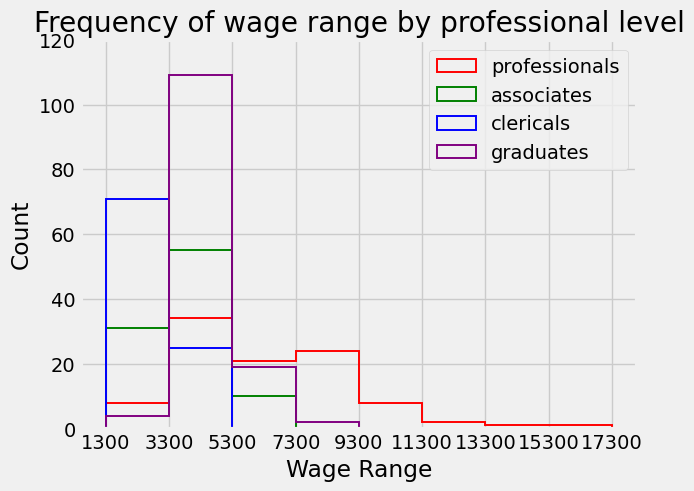

In [1701]:
# Histogram

# data extraction

pro_level = ['professionals| managers & executives', 'associate professionals & technicians', 'clerical| service & sales workers']

mean_wage = {lvl: [] for lvl in pro_level}  # initialise the dict with value 0 in each value
# getting the data according to pro_level elements
for i in wage:
    for lvl in pro_level:
        if lvl in i[1]:
            mean_wage[lvl].append(i[5])

# getting the wage range
mini = np.min(wage['mthly_basic_wage_50_pctile'])
maxi = np.max(wage['mthly_basic_wage_50_pctile'])
# rounded both min and max to nearest 100
mini_rounded = int(np.ceil(mini / 100) * 100)
maxi_rounded = int(np.ceil(maxi / 100) * 100)

# now using GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv, I will be getting the basic monthly mean of 2021
fresh_grad = dataSurvey
mean_wage['fresh graduates'] = []
for i in range(len(fresh_grad)):
    if fresh_grad[i][0] == 2021 and fresh_grad[i][11] != 'na':
        mean_wage['fresh graduates'].append(int(fresh_grad[i][11]))
        
# updating the key of the dict to make it shorter
updated_mean_wage = {}
keyd = ['professionals', 'associates', 'clericals', 'graduates']
for i, new_key in zip(mean_wage, keyd):
    updated_mean_wage[new_key] = mean_wage[i]

# setting the range
differences = maxi_rounded - mini_rounded # find the difference between mini and maxi
num_of_x = differences / 2000 # find the number of times it can be divided by 2000
interval = 0
ranges = [] # stores the x axis
for i in range(int(num_of_x) + 1): # added 1 as mini value is not included
    ranges.append(mini_rounded + interval)
    interval += 2000
        
# histogram plotting
colors = ['red', 'green', 'blue', 'purple']  # Assign colors to each professional level

for i, (level, color) in enumerate(zip(updated_mean_wage, colors)):
    plt.hist(updated_mean_wage[level], bins=ranges, label=level, color=color, fill=False, histtype='step', stacked=True, linewidth=1.4)
    
    
plt.style.use('fivethirtyeight')
plt.title('Frequency of wage range by professional level')
plt.xlabel('Wage Range')
plt.ylabel('Count')
plt.xticks(ranges)
plt.yticks([0, 20, 40, 60, 80, 100, 120])
plt.legend()
plt.grid(True)
plt.show()

### Terminology

The first thing I did was to get the mthly_basic_wage_50_pctile column in the csv file by their professional level. Next, I determined the minimum and maximum value of it before I start crafting the wages range. Next, I imported the fresh graduates student wage mean and add it into the dictionary. Before I start plotting the graph, I change the key of the dictionary to something shorter.

Plotting the histogram is not that hard as I already have the data ready. As I was using the histogram to compare 4 different professional levels, I ended up using the unfilled version of it so that it is easier to see the differences. After I set the labels, lagends, and the ticks, the graph is done.

## Why Histogram?

I chose to use a histogram for visualizing wage distributions across professional levels as it can effectively convey the frequency distribution of wage ranges. Utilizing distinct colors for each professional level, the histogram provides a clear comparison of wage distributions, enabling a comprehensive understanding of how wages are distributed within different segments of the workforce.

# Analysis

The histogram above tells us the frequency of wage range by the professional level. The professional levels includes professionals, associates, clericals, and fresh graduates. This graphs is primarily for us to know which pay range the professional levels are mainly on.

As you can see from the graph above, the clerical pay range is mainly in the $1300 to $3300 range. It overlaps to the $3300 to $5300 range but majority of the pay is still in the first range. When you look at the fresh graduates pay range, you can see that the majority of wage falls in the $3300 to $5300 range. From this simple analysis, we can tell that just by graduating from any university, your pay range will most likely be higher than a clerical since the majority is in the $3300 to $5300 pay range. Moreover, there are some outliers from fresh graduates that falls between the range of $5300 to $9300 though that is the minority few.

Moving on to the associates, you can see that it is similar to the fresh graduates pay range, which is $3300 to $5300. However, even though the majority pay range is the same range as the fresh graduates, you can tell that the associate's have a higher percentage of wages that range from $1300 to $3300 when compared to fresh graduates. This indicates that you are more likely to fall in the $1300 to $3300 pay range by being an associate compared to being a fresh graduates. This tells us that being fresh graduate will ensure that your pay range might be better than being a clerical and associate and will definitely not lose out.

However, when you compare fresh graduates with the professionals, you can tell that the professionals are the true winner. The majority of the pay range for fresh graduates falls in $3300 to $5300, however for the professionals, there are a large percentage of the pay range that are in the higher range, some even reaching ranges where no other professional levels are able to reach.

In conclusion, the analysis of the wage distribution across the different professional levels reveals a distinct pattern. It indicates that fresh graduates are more likely to have a higher pay range when compared to clericals and associates. However, professionals stand out as the ultimate winner as it demostrates a substantial proportion of higher pay ranges, show casing the potential for significant salary growth and advancement in their careers.

So back to the main question, this whole analysis tells us that by going to university, you will have a higher pay range for your initial entry in the industry, which is a good thing as it indicates that yes, having a university certificate will help your future growth.

## Graph 3 - Pie Chart

This pie chart will have 2 layer (nested). The outer layer will be the professions while the inner layers will be the pay of each industry that contributes to the entire profession. The pie chart will allow us to analyse the dominating industry for each professional level, letting us know the market better from a higher view point. For this chart, we will only be looking in 3 main industry: enginnering, business, and IT. Similarly, for the professional level, I will only be including professional and associate.

[[3958 3527 3980]
 [6701 5673 6786]
 [4188 4009 5043]]


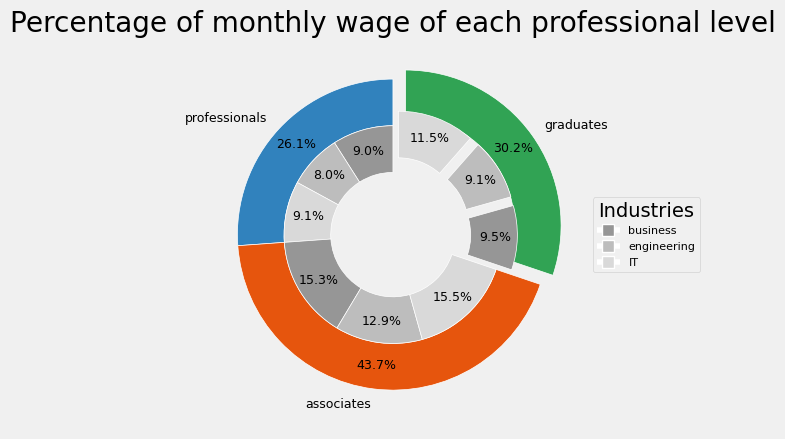

In [1702]:
# extracting mean in industry
pro_lvl = np.unique(wage['major_occ'])
pro_lvl = np.delete(pro_lvl, 1) # removing the pro lvl that we do not need
pro_lvl = np.delete(pro_lvl, 1)

data = wage

# specifying the 3 main industry
industry = ['business', 'engineering', 'IT']
mean_wage = {lvl: {ind: [0, 0] for ind in industry} for lvl in pro_lvl}  # initialise the dict

# getting the data according to pro_level elements and industry
for index, row in enumerate(data):
    included = False
    # the 'ai' part where data is sorted
    for pro in pro_lvl:
        for ind in industry:
            if pro == row[1] and ind in row[3]:
                mean_wage[pro][ind][0] += int(row[5])
                mean_wage[pro][ind][1] += 1
                included = True
                break
    # even more sorting from key words
    if not included:
        for pro in pro_lvl:
            if pro == row[1] and ('manag' in row[3] or 'sales' in row[3] or 'adviser' in row[3] or 'officer' in row[3] or 'account' in row[3] or 'insura' in row[3]):
                mean_wage[pro]['business'][0] += int(row[5])
                mean_wage[pro]['business'][1] += 1
                included = True
            elif pro == row[1] and ('system' in row[3] or 'software' in row[3] or 'it' in row[3]):
                mean_wage[pro]['IT'][0] += int(row[5])
                mean_wage[pro]['IT'][1] += 1
                included = True
            elif pro == row[1] and ('engineer' in row[3] or 'technician' in row[3]):
                mean_wage[pro]['engineering'][0] += int(row[5])
                mean_wage[pro]['engineering'][1] += 1
                included = True

# initialising a new key value pair
mean_wage['fresh grad'] = {ind: [0, 0] for ind in industry}
# key words in degrees
biz_related = ['account', 'business']
eng_related = ['engineering']
it_related = ['computing', 'info']
# adding in fresh grads data
fresh_grad = dataSurvey
for i in fresh_grad:
    # ensure that it is only from the year 2021 and sorting it according to industry
    if i[0] == 2021:
        for z in biz_related:     
            if z in i[3].lower():
                mean_wage['fresh grad']['business'][0] += int(i[6])
                mean_wage['fresh grad']['business'][1] += 1
        for z in eng_related:
            if z in i[3].lower():
                mean_wage['fresh grad']['engineering'][0] += int(i[6])
                mean_wage['fresh grad']['engineering'][1] += 1
        for z in it_related:
            if z in i[3].lower():
                mean_wage['fresh grad']['IT'][0] += int(i[6])
                mean_wage['fresh grad']['IT'][1] += 1

# change the key of the dict to make it shorter
nicer_dict = {}
keyd = ['professionals', 'associates', 'graduates']
for i, new_key in zip(mean_wage, keyd):
    nicer_dict[new_key] = mean_wage[i]
mean_wage = nicer_dict

# plotting
values = []
# appending data in values for plotting
for level, level_data in mean_wage.items():
    row = []
    for field, values_list in level_data.items():
        row.append(int(round((values_list[0] / values_list[1]), 0)))
    values.append(row)
# create a new figure and subplot
fig, ax = plt.subplots()
# initialising the size and colors for each segments
size = 0.3
values = np.array(values)
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 3, 5, 6, 7, 9, 10, 11])
inner_colors = cmap([17, 18, 19])
# appending the data according to what I need (outer label: professional level, inner label: each industry)
outer_labels = []
inner_labels = []
for i in mean_wage:
    outer_labels.append(i)
    inner = (mean_wage[i].keys())
    for x in inner:
        inner_labels.append(x)

# creaing legend for the inner ring with custom labels and marker shapes
legend_labels = ['business', 'engineering', 'IT']
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=8) for color in inner_colors]

# adding legend to the plot with specified handles, labels, title, and position
ax.legend(legend_handles, legend_labels, title='Industries', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

# plotting the outer ring using a pie chart with specified colors, properties, and labels
ax.pie(values.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), startangle=90, autopct='%1.1f%%', labels=outer_labels, textprops={'fontsize': 9}, pctdistance=0.85, explode=[0, 0, 0.1])

# plotting the inner ring using a pie chart with specified colors, properties, and labels
ax.pie(values.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), startangle=90, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.8, explode=[0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1])

# setting the aspect ratio to "equal" for a circular pie chart with a title
ax.set(aspect="equal", title='Percentage of monthly wage of each professional level')
plt.show()

### Terminology

The pie chart was relatively easy to make. To get the datas, I did a simple sorting system that sorts the values according to the professional levels and mean wage according to the industry. After that comes the plotting of graph. This part is simple as there is a documentation with sample code for nested pie charts, and I played around with it. All I changed was to display the values and shifting them to a empty spot and changing the colors.

## Why Pie chart?


A nested pie chart was used to illustrate the percentage distribution of monthly wages across different professional levels and industries. This visual representation allows for a comprehensive understanding of how monthly wages are proportionally distributed within each professional level and industry, offering insights into the relative contributions of business, engineering, and IT sectors to the overall income in various professional categories.

# Analysis

The pie chart above is related to the histogram above. However, for this pie chart, I have removed the clerical as a professional level as the difference between a clerical and a university graduate is a lot. This pie chart shows us the percentage of monthly wages from the 3 different professional level. Not only that, I have made a nested pie chart to add in the percentage that the industry: business, engineering, and IT is contributing to each professional level.

From the pie chart above, it is observed that the associates have the largest sample size amoung the 3 as its percentage of monthly wage contributes to 43.7% of the entire outer pie chart. Why did I say the largest sample size instead of the highest monthly wage since its percentage is the largest? From the histogram above, it can be seen that the professionals have the highest wage amoung the 3, yet it only contributes to 26.1% of the outer pie chart.

Diving deeper, we see the percentage of the 3 main industry that contributes to each of the professional level, which is business, engineering, and information technology (IT). Looking at the chart as a whole, we can that the IT industry is contributing the most for each professional level. It contributes to 9.1% of the professionals, 11.5% of the fresh graduates, and 15.5% for the associates. This indicates that the IT field is paying better compared to the other 2 fields for all 3 professional levels. The second industry that contributes most to all 3 professional level is business.

In conclusion, the pie chart analysis reveals that while professionals command the highest individual monthly wages among the professional levels, associates have the largest representation in the dataset, contributing 43.7% to the entire distribution. Moreover, the nested pie chart demonstrates that the IT industry consistently leads in contributing to monthly wages across all professional levels, suggesting a lucrative and influential role for IT in shaping compensation trends in the job market

## Graph 4 - scatter graph

Using the JobVacancybyIndustryandOccupationalGroup.csv file, I will be doing a scatter graph to form a better visualisation of the number of vacancy. The career that this file provides is very generic, therefore I will try my best to sort them out according to their industry as closely as possible, there will be some industry combined together.

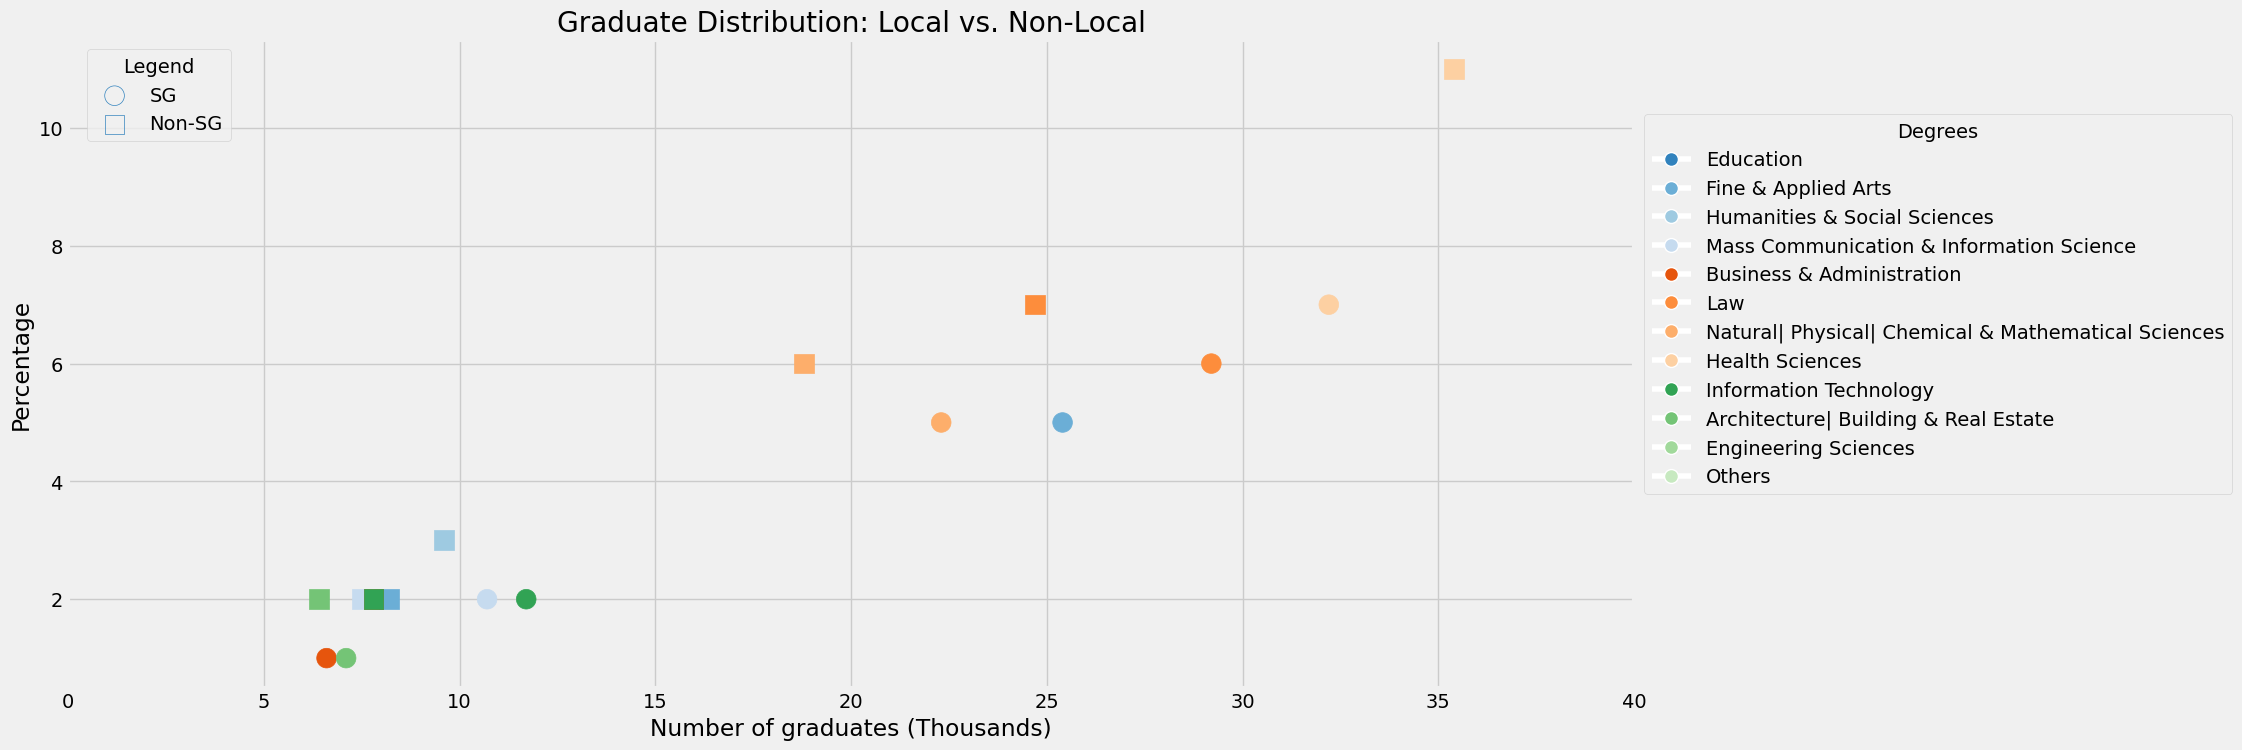

In [1704]:
# x axis -> num of grads
sg = (localVSglobal['Singapore'])
num_of_sg = []
non_sg = (localVSglobal['Outside_Singapore_Total'])
num_of_non = []
for i in range(len(sg)):
    try:
        float(sg[i])
        float(non_sg[i])
        if i != 1:
            num_of_sg.append(sg[i])
            num_of_non.append(non_sg[i])
    except:
        continue



# y axis -> % of total
percent_sg = []
percent_non = []
for i in range(len(num_of_sg)):
    total_sg = sg[1]
    total_non = non_sg[1]
    percent_sg.append(round(float(num_of_sg[i])/float(total_sg)*100, 0))
    percent_non.append(round(float(num_of_non[i])/float(total_non)*100, 0))


# getting the degrees
degrees = []
for i, degree in enumerate(localVSglobal['Field_of_Study']):
    if i >= 2 and i <= 13:
        degrees.append(degree)

# plotting
com2 = percent_sg + percent_non
com1 = num_of_sg + num_of_non

# Set up the scatter plot
size = 200
plt.figure(figsize=(18, 8))
# Use a colormap to get a range of colors
cmap = plt.get_cmap("tab20c")

# Map each degree to a unique color
degree_to_color = {degree: cmap(i) for i, degree in enumerate(degrees)}

# Convert strings to float for plotting
num_of_sg = [float(value) for value in num_of_sg]
num_of_non = [float(value) for value in num_of_non]

# Filter out values greater than 40
filtered_num_of_sg = [value for value in num_of_sg if value <= 40]
filtered_percent_sg = [percent_sg[i] for i, value in enumerate(num_of_sg) if value <= 40]

filtered_num_of_non = [value for value in num_of_non if value <= 40]
filtered_percent_non = [percent_non[i] for i, value in enumerate(num_of_non) if value <= 40]

cmap = plt.colormaps["tab20c"]
colors = cmap([1, 3, 5, 7, 9, 11, 13, 15, 17])
colors = cmap([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Plot the filtered values
plt.scatter(filtered_num_of_sg, filtered_percent_sg, label='SG', s=size, marker='o', c=colors)
plt.scatter(filtered_num_of_non, filtered_percent_non, label='Non-SG', s=size, marker='s', c=colors)

# Set x-axis ticks and labels
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
plt.xticks(x_ticks, labels=[tick for tick in x_ticks])
plt.xlabel('Number of graduates (Thousands)')
plt.ylabel('Percentage')
plt.title('Graduate Distribution: Local vs. Non-Local')

# Add legend outside the graph
legend1 = plt.legend([scatter_sg, scatter_non], ['SG', 'Non-SG'], title='Legend', loc='upper right', bbox_to_anchor=(0.11, 1))
plt.gca().add_artist(legend1)  # Add the first legend back to the current Axes

# Add legend for colors representing degrees
plt.legend(degree_handles, degrees, title='Degrees', loc='upper left', bbox_to_anchor=(1, 0.9))
plt.show()

### Terminology

To get the scatter plot, I first have to get the x and y axis value, which are number of graduates and the percentage of them respectively. After that, I get the data which I will be plotting with; degrees. After that, the plotting is simple. I first filter out the outliers which number of graduates is over 40,000. I did this as I wanted to focus more on the non outliers. Next, I assign each degree with a color using cmap as well as assigning a market for SG and non-SG. Finally, I did the usual title, labels, and made 2 legends. One for the markers and one for the degrees.

## Why Scatter plot

A scatter plot was used as it can effectively illustrates the relationship between the number of graduates (in thousands) and the percentage of total graduates, comparing local and non-local students. By representing each data point with distinctive markers for Singaporean and non-Singaporean graduates and using color-coded degrees, the plot provides a comprehensive visual analysis of the distribution and proportionality of graduates in various fields of study, offering valuable insights into the composition of the student population.

# Analysis

From the scatter plot above shows you the percentage of graduates as well as the number of graduates. The percentage of graduates is when compared with the other degree be it local or non-local.

So what are the trends that can be observed from the scatter plot?

Firstly, if you look at the points for information technology (dark green), you can see that both of the graduates (local and non-local) contributes to 2% of the total graduates. However, local point indicates that there were more graduates when compared with from the non-local university, the difference being roughly 5000 more. What this tells us that majority of singaporeans prefer to study information technology in a local university compared to a non-local university as the data shows that more graduates from a local university.

Next, if you look at the business & administration point (red), you will realise that you can only see the marker for local university only. Where is the non-local marker for business & administration then? For each of the color or markers that are not present in the scatter plot means that they exceed the 'limit' of having 40,000 graduates and 10% of graduates. So for the non-local business & administration, it is on a different league when compared with the local marker. This indicates that unlike information technology, majority of singaporeans prefer to go to a non-local university to study business & administration.

Lastly, we shall look at the engineering science side. If you look closely within the graph, you will not find any marker with its color. What does this mean then? This mean that the engineering and science courses is very popular, even exceeding the 'limit' of the scatter plot, indicating the high popularity among graduates and their substantial representation goes beyond the scale.

To summarise, the scatter plot reveals notable trends in graduate distribution across various fields. Information technology attracts more local graduates, suggesting a preference for local institutions, while business and administration demonstrate a higher preference for non-local universities, evident from the absence of local markers. Additionally, the overwhelming popularity of engineering and science programs, surpassing the visual limits of the plot, underscores their significant representation and appeal among graduates. I will only be comparing the 3 main industry for this scatter plot, of course, if you want to explore the other industry, do feel free to form your own analysis.

## Graph 5 - Line graph

Using the given csv file, I will be plotting a line graph to have a better overview of the number of graduates from each university over the years. Do note that even though the csv file includes polytechnics, ITE, and the 2 art institution, I will not be including them as I will be focusing on university solely

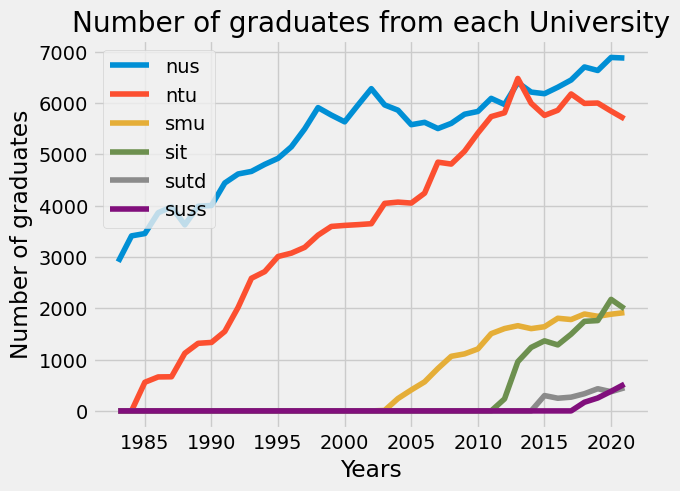

In [1652]:
# Graph 1 - Line graph

years = np.unique(gradsByInt['year']) # extract all the years

uni = []
for i in gradsByInt.dtype.names[2:8]: # extract the university name
    uni.append(i)

uni_data = {}
for i, column in enumerate(gradsByInt.dtype.names[2:8]): # loop through the headers of the uni
    uni_data[uni[i]] = gradsByInt[column][::2] # put the uni name as the key and the data as the value as a dict. sliced it so that i only take the value of MF instead of just F
    
for i in range(len(uni)): # loops through each key
    plt.plot(years, uni_data[uni[i]], label=uni[i]) # plot a line graph

plt.xlabel('Years')
plt.ylabel('Number of graduates')
plt.title('Number of graduates from each University')
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000])
plt.legend()
plt.show()

### Terminology

First, I extracted the years for the x axis and universities for the data label. Using the list of universities, I loop through the entire columns for these universities to extract to extract the number of graduates. The steps for extracting the number of graduates is set to 2 as the dataset split the sex for each year to male and female, and just female. Therefore, by skipping one row every loop, I am just taking the data for both male and female.

The plotting of graph is relatively straightforward as well. All I had to do was to loop through the data that I have extracted (number of graduates), while plotting it each time (total of 6 times). After that, I add the title, x and y axis label, and legend to make it easier for viewers to interpret the information in the graph.

## Why Line graph?

I opted for a line graph to visualize the annual variation in the number of graduates from different universities. This graphical representation, with each university represented by a distinct line, allows for a clear comparison of trends over the years, facilitating the identification of any significant fluctuations or patterns in the graduation numbers across the specified universities.

# Analysis
The line graph above illustrates a consistent upward trend in the number of graduates from each university over the years. Even though there are occasional flucuations, where the number of graduates decreased during certain years, the overall trend is positive.

This trend tells us that there will be a continual increase in the number of university graduates annually. The growing number of fresh graduates entering the workforce suggests that there will be an expanding pool of skilled individuals that are contributing to the society. This observation is important as it makes us understand the potential impact on the job market and various sectors as a larger influx of graduates may influence the employment trend, social advancement, and wages trend.

Another thing to note is that even though covid-19 hit Singapore in late January 2020, the number of graduates from majority of the university is increasing. What this tells us is that the higher education in Singapore is very adaptable and resilient during that period. It was able to cause an upward trend in the number of graduates through that tough period of time.

In conclusion, the consistent upward trend in the number of graduates from each university suggests a positive trajectory for higher education in Singapore. Despite challenges posed by the COVID-19 pandemic, the adaptability and resilience of the higher education system are evident in the continued growth of graduates, indicating its capacity to overcome obstacles and maintain a steady contribution to the skilled workforce, making university a good chance for students to upskill themself and secure a better future easier.

# Final Analysis

The analysis of employment trends, wage distributions, and graduation dynamics provide us with a comprehensive understanding of the value of pursuing a university education. Fields such as business, engineering, and science have been shown to have consistent high employment rates and positive wage trends, which establish all 3 of them as secure choices for students. On the other hand, medicine and law stood out for their unwavering dominance in both employment rates and monthly mean wages, emphasizing their lucrative yet demanding nature. However, information technology industry emerged as an influential player. The IT industry have the potential to rival traditional high-earning fields.

The comparision between local and non-local graduates in various field also revealed intriguing patterns, with information technology attracting more local graduates, indicating a preference for local institutions, while business and administration demonstrate a higher preference for non-local universities.

The examination of professional levels through the histogram and pie chart offers additional insights. Fresh graduates, have a majority count in the $3300 to $5300 pay range, shows promising potential for salary growth when compared to clericals and associates.On the other hand, Professionals have a substantial representation in higher pay ranges, underscoring their potential for significant salary growth and career advancement. This detailed analysis equips prospective students with valuable insights into wage distributions across professional levels, guiding them toward informed decisions about their educational pathways for a promising and rewarding future. Additionally, with the analysis for the major industry mean wage under each professional level, it can give students a better level of understanding of which industry is better at which professional level, though the ultimate winner is information technology.

In conclusion, the comprehensive analysis of the graphs above clearly demonstrates the numerous advantages of pursuing a university education. Not only does it highlight the substantial benefits of higher pay for fresh graduates, it also provides valuable insights into the preferred degrees based on wage and employment rates. The emergence of information technology as a frontrunner in recent years further underscores the dynamic nature of the job market. Choosing to pursue a university degree not only opens doors to enhanced career prospects but also equips individuals with the knowledge and skills necessary for a successful and fulfilling future.

### Recommemdation

With all the data and information presented to us, here is where we will answer Adam, the guy in the scenario questions. Yes, it is worth it to spend a few years in a University to get a degree. Since Adam does not have any particular interests and just want a good and stable life, I would recommend Adam to try to apply to the top 3 University in Singapore; NUS, NTU, SMU, since they have the highest graduation percentage. For the degree to take, I would recommend him to take Information Technology related courses such as Software Engineering or Computer Science. He was not really into business studies, so maybe he might be interested in the Information Technology side of things. Moreover, according to the analysis, Information Technology have the highest mean wage no matter which level of profession you are. Additionally, it have a ridiculously high percentage of employment. These factors can guarantee his stable life in his future, provided that he put in the effort. Adam do not need to go to an oversea university as majority of people prefer to study in local university for Information Technology related courses.

# Conclusion

To conclude, this analysis helps us dive deeper into the various factors that contributes to the decision of students, like Adam, to pick decide going on a University and picking a degree. These factors includes porpularity, pay, and employment rates. Students will be able to use these information to safely choose a university and a degree to study in. However, a student should also go beyond these statistics and also consider other factors such as travel distance and personal interests when picking a university and degree.